In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models, layers
from keras.utils import to_categorical
from keras.regularizers import l2, l1
from sklearn.model_selection import KFold

C:\Users\Jiang\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Scalar regression

In [2]:
import random
random.seed(1234)

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

xvals = np.arange(1,501)

In [3]:
class Network():
    def __init__(self):
        self._model = models.Sequential()
        self._loss = np.ones(500)
        self._mse = np.ones(500)
    def _compile(self):
        self._model.add(layers.Dense(1))
        self._model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])        
    def baseline(self):
        self._model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dense(64, activation='relu'))
        self._compile()
    def dropout(self):
        self._model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dropout(0.5))
        self._model.add(layers.Dense(64, activation='relu'))
        self._model.add(layers.Dropout(0.5))
        self._compile()
    def l1(self):
        self._model.add(layers.Dense(64, kernel_regularizer=l1(0.001), activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dense(64, kernel_regularizer=l1(0.001), activation='relu'))
        self._compile()
    def l2(self):
        self._model.add(layers.Dense(64, kernel_regularizer=l2(0.001), activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dense(64, kernel_regularizer=l2(0.001), activation='relu'))
        self._compile()    
    def layer3(self):
        self._model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dense(64, activation='relu'))
        self._model.add(layers.Dense(64, activation='relu'))
        self._compile()
    def layer2b(self):
        self._model.add(layers.Dense(200, activation='relu', input_shape=(train_data.shape[1],)))
        self._model.add(layers.Dense(200, activation='relu'))
        self._compile()        
    def kfold_validate(self):
        k = 10
        num_val_samples = len(train_data) // k
        num_epochs = 500
        all_mse_histories = []
        for i in range(k):
            print('processing fold #', i)
            val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
            val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
            partial_train_data = np.concatenate(
                [train_data[:i * num_val_samples],
                 train_data[(i + 1) * num_val_samples:]],
                axis=0)
            partial_train_targets = np.concatenate(
                [train_targets[:i * num_val_samples],
                 train_targets[(i + 1) * num_val_samples:]],
                axis=0)

            model = self._model
            history = model.fit(partial_train_data, partial_train_targets,
                                validation_data=(val_data, val_targets),
                                epochs=num_epochs, batch_size=128, verbose=0)
            mse_history = history.history['mean_squared_error']
            all_mse_histories.append(mse_history)
        self._histories = [np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]
    def history(self):
        return self._loss[1:,].mean(axis=0), self._mse[1:,].mean(axis=0)
    def scores(self):
        return self._histories
    @property
    def model(self):
        return self._model

## 1. Baseline Model (Textbook)

In [4]:
model1 = Network()
model1.baseline()
model1.kfold_validate()
valmse1 = model1.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


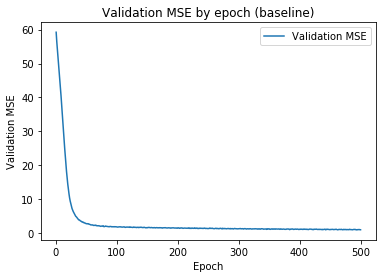

In [5]:
plt.plot(xvals, valmse1, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (baseline)")

### 2. Dropout Model

In [6]:
model2 = Network()
model2.dropout()
model2.kfold_validate()
valmse2 = model2.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


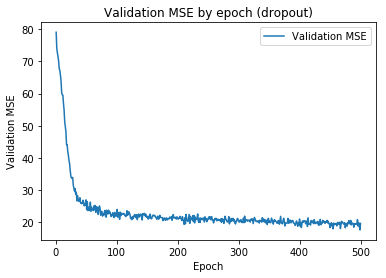

In [7]:
plt.plot(xvals, valmse2, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (dropout)")

### 3. L1 weight regularization with 0.001 Penalty

In [8]:
model3 = Network()
model3.l1()
model3.kfold_validate()
valmse3 = model3.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


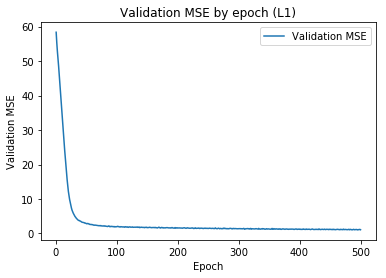

In [9]:
plt.plot(xvals, valmse3, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (L1)")

### 4. L2 weight regularization with 0.001 Penalty

In [10]:
model4 = Network()
model4.l2()
model4.kfold_validate()
valmse4 = model4.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


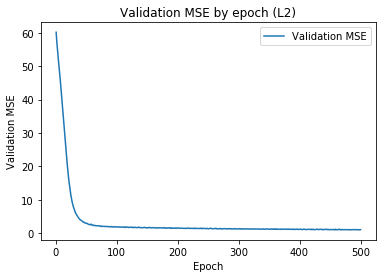

In [11]:
plt.plot(xvals, valmse4, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (L2)")

### 5. 3 layers model

In [12]:
model6 = Network()
model6.layer3()
model6.kfold_validate()
valmse6 = model6.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


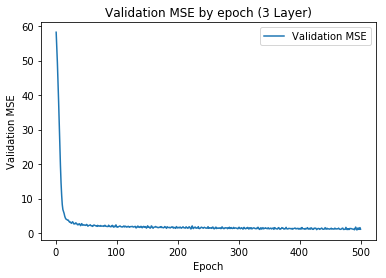

In [13]:
plt.plot(xvals, valmse6, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (3 Layer)")

### 6. 2 Layers with 200 units each

In [14]:
model7 = Network()
model7.layer3()
model7.kfold_validate()
valmse7 = model7.scores()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


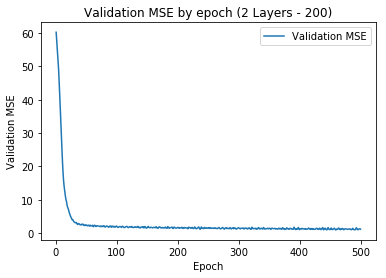

In [15]:
plt.plot(xvals, valmse7, label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc='best')
plt.title("Validation MSE by epoch (2 Layers - 200)")

### Model Selection

We are going to use the smooth_curve function provided by the textbook for graphing. Note the first 10 points are excluded from the graph.

In [16]:
print("baseline:", min(valmse1))
print("Dropout:", min(valmse2))
print("L1:", min(valmse3))
print("L2:", min(valmse4))
print("3 Layers:", min(valmse6))
print("2 Layers - 200:", min(valmse7))

baseline: 0.9738199321614516
Dropout: 17.661631521287855
L1: 1.0273740517569112
L2: 0.9422243630820576
3 Layers: 0.9060815428967004
2 Layers - 200: 0.9446821005462291


Note from the graph we can observe that the dropout model has the worst performance while the other five models are having a close race. I intend to control the y-label to be between 0 and 5 to show the difference between the differences between the five models. Note that will makes you unable to see the line of the "Dropout" model.

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

nvalmse1 = smooth_curve(valmse1[10:])
nvalmse2 = smooth_curve(valmse2[10:])
nvalmse3 = smooth_curve(valmse3[10:])
nvalmse4 = smooth_curve(valmse4[10:])
nvalmse6 = smooth_curve(valmse6[10:])
nvalmse7 = smooth_curve(valmse7[10:])


nxvals = np.arange(11,501)
#plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
#plt.xlabel('Epochs')
#plt.ylabel('Validation MAE')
#plt.show()

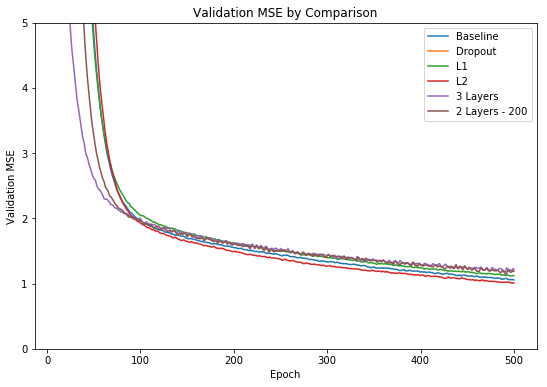

In [18]:
from scipy.interpolate import spline
plt.figure(figsize=(9,6))
plt.plot(nxvals, nvalmse1, label='Baseline')
plt.plot(nxvals, nvalmse2, label='Dropout')
plt.plot(nxvals, nvalmse3, label='L1')
plt.plot(nxvals, nvalmse4, label='L2')
plt.plot(nxvals, nvalmse6, label='3 Layers')
plt.plot(nxvals, nvalmse7, label='2 Layers - 200')
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.ylim(0,5)
plt.legend(loc='best')
plt.title("Validation MSE by Comparison")

It is a close race, but the smoothed graph indicates that the model with the l2 weighting penalty has the best performance, so would will calculate the value based on this model. Considering that the MSE statistic is still decreasing, we can safely set the epoch to 500. Batchsize is set to adjust to the shape of the input image.

### Final Model

In [19]:
final = Network()
final.l2()
final.model.fit(train_data, train_targets, epochs=500, batch_size=8)
test_loss, test_mse = final.model.evaluate(test_data, test_targets)

Epoch 1/500
404/404 [==============================] - 0s 901us/step - loss: 455.8506 - mean_squared_error: 455.7643
Epoch 2/500
404/404 [==============================] - 0s 159us/step - loss: 152.3692 - mean_squared_error: 152.2701
Epoch 3/500
404/404 [==============================] - 0s 168us/step - loss: 34.9725 - mean_squared_error: 34.8644
Epoch 4/500
404/404 [==============================] - 0s 167us/step - loss: 23.5334 - mean_squared_error: 23.4260
Epoch 5/500
404/404 [==============================] - 0s 166us/step - loss: 19.4178 - mean_squared_error: 19.3127
Epoch 6/500
404/404 [==============================] - 0s 166us/step - loss: 17.3131 - mean_squared_error: 17.2095
Epoch 7/500
404/404 [==============================] - 0s 172us/step - loss: 15.4331 - mean_squared_error: 15.3303
Epoch 8/500
404/404 [==============================] - 0s 167us/step - loss: 14.3664 - mean_squared_error: 14.2638
Epoch 9/500
404/404 [==============================] - 0s 171us/step - loss:

404/404 [==============================] - 0s 163us/step - loss: 5.3364 - mean_squared_error: 5.2036
Epoch 72/500
404/404 [==============================] - 0s 166us/step - loss: 5.2912 - mean_squared_error: 5.1579
Epoch 73/500
404/404 [==============================] - 0s 176us/step - loss: 5.2499 - mean_squared_error: 5.1161
Epoch 74/500
404/404 [==============================] - 0s 155us/step - loss: 5.2381 - mean_squared_error: 5.1037
Epoch 75/500
404/404 [==============================] - 0s 156us/step - loss: 5.1242 - mean_squared_error: 4.9896
Epoch 76/500
404/404 [==============================] - 0s 156us/step - loss: 5.2213 - mean_squared_error: 5.0859
Epoch 77/500
404/404 [==============================] - 0s 156us/step - loss: 5.1170 - mean_squared_error: 4.9810
Epoch 78/500
404/404 [==============================] - 0s 153us/step - loss: 5.1275 - mean_squared_error: 4.9908
Epoch 79/500
404/404 [==============================] - 0s 158us/step - loss: 5.0574 - mean_squared_e

404/404 [==============================] - 0s 156us/step - loss: 3.3153 - mean_squared_error: 3.1470
Epoch 143/500
404/404 [==============================] - 0s 151us/step - loss: 3.3100 - mean_squared_error: 3.1413
Epoch 144/500
404/404 [==============================] - 0s 148us/step - loss: 3.2124 - mean_squared_error: 3.0431
Epoch 145/500
404/404 [==============================] - 0s 158us/step - loss: 3.2009 - mean_squared_error: 3.0314
Epoch 146/500
404/404 [==============================] - 0s 161us/step - loss: 3.2430 - mean_squared_error: 3.0733
Epoch 147/500
404/404 [==============================] - 0s 152us/step - loss: 3.1534 - mean_squared_error: 2.9831
Epoch 148/500
404/404 [==============================] - 0s 164us/step - loss: 3.3006 - mean_squared_error: 3.1301
Epoch 149/500
404/404 [==============================] - 0s 157us/step - loss: 3.2485 - mean_squared_error: 3.0776
Epoch 150/500
404/404 [==============================] - 0s 149us/step - loss: 3.1095 - mean_s

404/404 [==============================] - 0s 173us/step - loss: 2.3102 - mean_squared_error: 2.1163
Epoch 214/500
404/404 [==============================] - 0s 148us/step - loss: 2.2996 - mean_squared_error: 2.1054
Epoch 215/500
404/404 [==============================] - 0s 117us/step - loss: 2.3237 - mean_squared_error: 2.1294
Epoch 216/500
404/404 [==============================] - 0s 152us/step - loss: 2.3490 - mean_squared_error: 2.1543
Epoch 217/500
404/404 [==============================] - 0s 143us/step - loss: 2.2803 - mean_squared_error: 2.0852
Epoch 218/500
404/404 [==============================] - 0s 146us/step - loss: 2.1655 - mean_squared_error: 1.9701
Epoch 219/500
404/404 [==============================] - 0s 151us/step - loss: 2.3170 - mean_squared_error: 2.1214
Epoch 220/500
404/404 [==============================] - 0s 137us/step - loss: 2.2240 - mean_squared_error: 2.0279
Epoch 221/500
404/404 [==============================] - 0s 153us/step - loss: 2.3113 - mean_s

404/404 [==============================] - 0s 148us/step - loss: 1.8184 - mean_squared_error: 1.6059
Epoch 285/500
404/404 [==============================] - 0s 151us/step - loss: 1.6909 - mean_squared_error: 1.4782
Epoch 286/500
404/404 [==============================] - 0s 154us/step - loss: 1.8277 - mean_squared_error: 1.6151
Epoch 287/500
404/404 [==============================] - 0s 155us/step - loss: 1.6164 - mean_squared_error: 1.4035
Epoch 288/500
404/404 [==============================] - 0s 156us/step - loss: 1.7474 - mean_squared_error: 1.5341
Epoch 289/500
404/404 [==============================] - 0s 153us/step - loss: 1.7031 - mean_squared_error: 1.4899
Epoch 290/500
404/404 [==============================] - 0s 151us/step - loss: 1.7143 - mean_squared_error: 1.5009
Epoch 291/500
404/404 [==============================] - 0s 142us/step - loss: 1.7026 - mean_squared_error: 1.4890
Epoch 292/500
404/404 [==============================] - 0s 166us/step - loss: 1.7066 - mean_s

404/404 [==============================] - 0s 151us/step - loss: 1.5074 - mean_squared_error: 1.2846
Epoch 356/500
404/404 [==============================] - 0s 161us/step - loss: 1.4956 - mean_squared_error: 1.2728
Epoch 357/500
404/404 [==============================] - 0s 158us/step - loss: 1.5335 - mean_squared_error: 1.3105
Epoch 358/500
404/404 [==============================] - 0s 149us/step - loss: 1.4163 - mean_squared_error: 1.1931
Epoch 359/500
404/404 [==============================] - 0s 153us/step - loss: 1.4400 - mean_squared_error: 1.2165
Epoch 360/500
404/404 [==============================] - 0s 158us/step - loss: 1.3876 - mean_squared_error: 1.1641
Epoch 361/500
404/404 [==============================] - 0s 157us/step - loss: 1.5837 - mean_squared_error: 1.3600
Epoch 362/500
404/404 [==============================] - 0s 157us/step - loss: 1.4242 - mean_squared_error: 1.2002
Epoch 363/500
404/404 [==============================] - 0s 154us/step - loss: 1.3506 - mean_s

404/404 [==============================] - 0s 143us/step - loss: 1.2962 - mean_squared_error: 1.0670
Epoch 427/500
404/404 [==============================] - 0s 171us/step - loss: 1.2965 - mean_squared_error: 1.0673
Epoch 428/500
404/404 [==============================] - 0s 166us/step - loss: 1.2737 - mean_squared_error: 1.0443
Epoch 429/500
404/404 [==============================] - 0s 144us/step - loss: 1.2446 - mean_squared_error: 1.0154
Epoch 430/500
404/404 [==============================] - 0s 152us/step - loss: 1.2441 - mean_squared_error: 1.0147
Epoch 431/500
404/404 [==============================] - 0s 147us/step - loss: 1.2684 - mean_squared_error: 1.0389
Epoch 432/500
404/404 [==============================] - 0s 153us/step - loss: 1.2844 - mean_squared_error: 1.0547
Epoch 433/500
404/404 [==============================] - 0s 153us/step - loss: 1.2089 - mean_squared_error: 0.9792
Epoch 434/500
404/404 [==============================] - 0s 151us/step - loss: 1.3810 - mean_s

404/404 [==============================] - 0s 158us/step - loss: 1.1666 - mean_squared_error: 0.9329
Epoch 497/500
404/404 [==============================] - 0s 158us/step - loss: 1.1445 - mean_squared_error: 0.9106
Epoch 498/500
404/404 [==============================] - 0s 151us/step - loss: 1.1354 - mean_squared_error: 0.9016
Epoch 499/500
404/404 [==============================] - 0s 153us/step - loss: 1.2264 - mean_squared_error: 0.9927
Epoch 500/500
102/102 [==============================] - 0s 849us/step


In [20]:
print("Test MSE:", test_mse)

Test MSE: 13.09142759734509
